<a href="https://colab.research.google.com/github/Anshad-Aziz/Machine_Learning/blob/main/Your_Job_vs_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc


In [2]:
data=pd.read_csv('My_Data.csv')

In [3]:
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [4]:
data

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


In [6]:
data.describe()

,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000
mean,400.708032,1817.678071,inf
std,311.564781,1086.853037,NaN
min,1.000000,0.000000,0.036585
25%,161.000000,1085.250000,0.137271
50%,270.000000,1577.500000,0.199281
75%,608.750000,2273.000000,0.260572
max,1387.000000,5666.000000,inf


In [7]:
missing_values=data.isnull().sum()

In [8]:
inf_values=(data['AI_Workload_Ratio']==float('inf')).sum()

In [9]:
missing_values,inf_values

(Job titiles          0
 AI Impact            0
 Tasks                0
 AI models            0
 AI_Workload_Ratio    0
 Domain               0
 dtype: int64,
 7)

In [10]:
data['AI_Workload_Ratio'].replace(float('inf'),np.nan,inplace=True)

In [11]:
median_ratio=data['AI_Workload_Ratio'].median()
data['AI_Workload_Ratio'].fillna(median_ratio,inplace=True)

In [12]:
inf_values_after_replacement=(data['AI_Workload_Ratio']==float('inf')).sum()
inf_values_after_replacement

0

In [13]:
data.columns

Index(['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

Text(0, 0.5, 'Frequency')

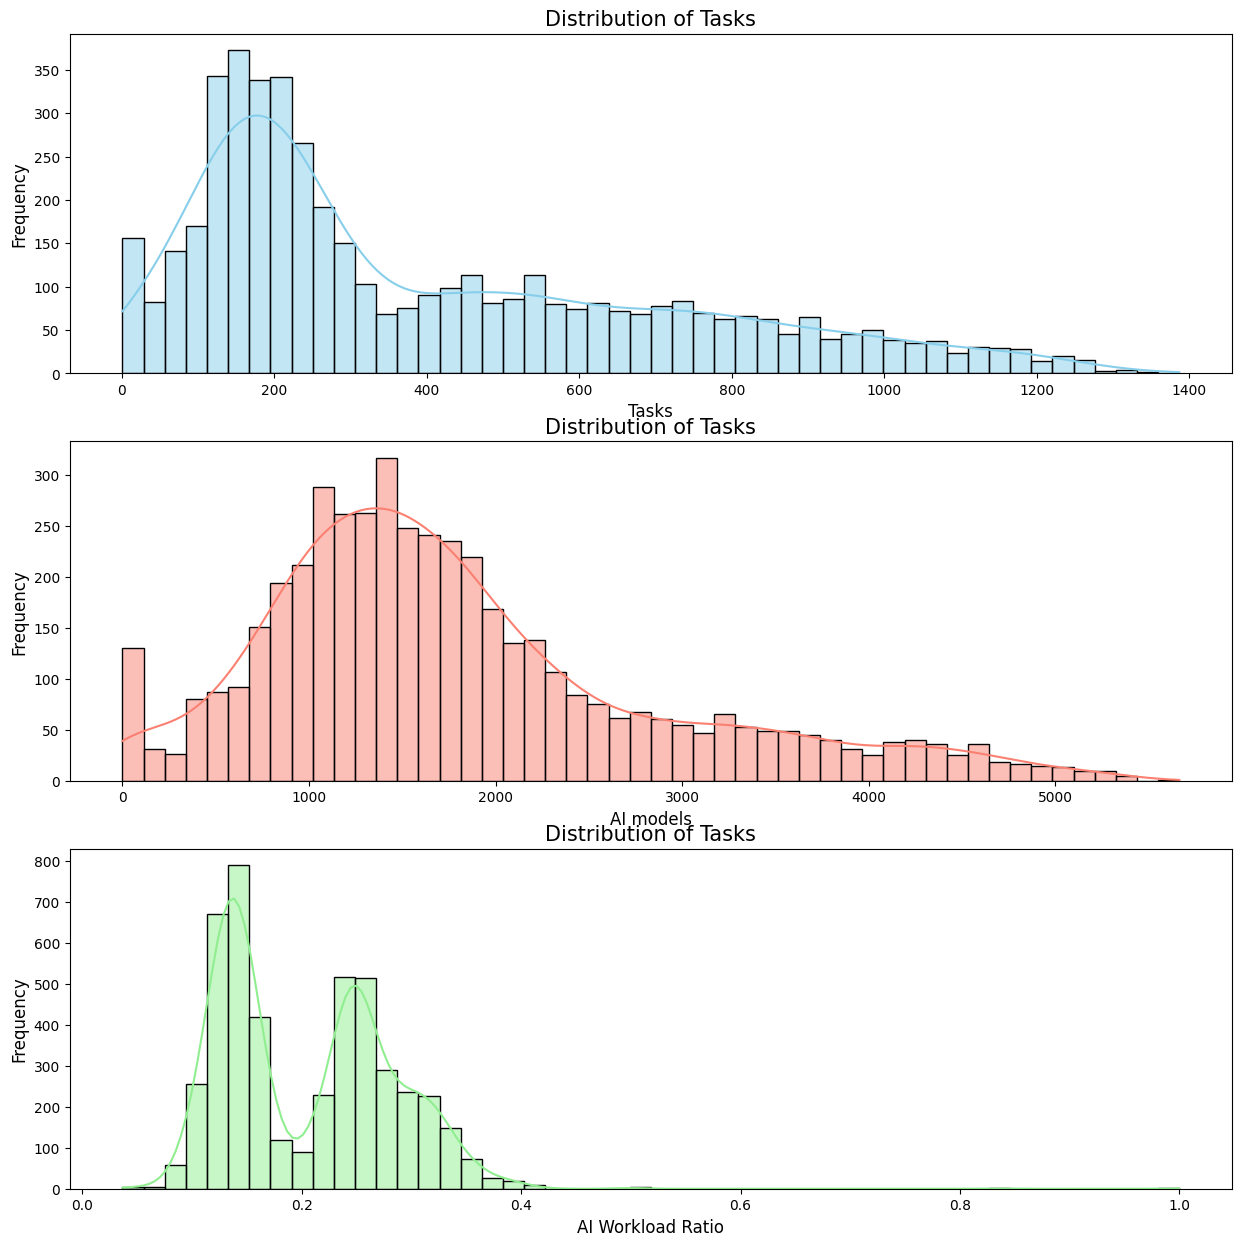

In [16]:
fig,ax=plt.subplots(3,1,figsize=(15,15))

sns.histplot(data['Tasks'],bins=50,kde=True,ax=ax[0],color='skyblue')
ax[0].set_title('Distribution of Tasks',fontsize=15)
ax[0].set_xlabel('Tasks',fontsize=12)
ax[0].set_ylabel('Frequency',fontsize=12)


sns.histplot(data['AI models'],bins=50,kde=True,ax=ax[1],color='salmon')
ax[1].set_title('Distribution of Tasks',fontsize=15)
ax[1].set_xlabel('AI models',fontsize=12)
ax[1].set_ylabel('Frequency',fontsize=12)


sns.histplot(data['AI_Workload_Ratio'],bins=50,kde=True,ax=ax[2],color='lightgreen')
ax[2].set_title('Distribution of Tasks',fontsize=15)
ax[2].set_xlabel('AI Workload Ratio',fontsize=12)
ax[2].set_ylabel('Frequency',fontsize=12)

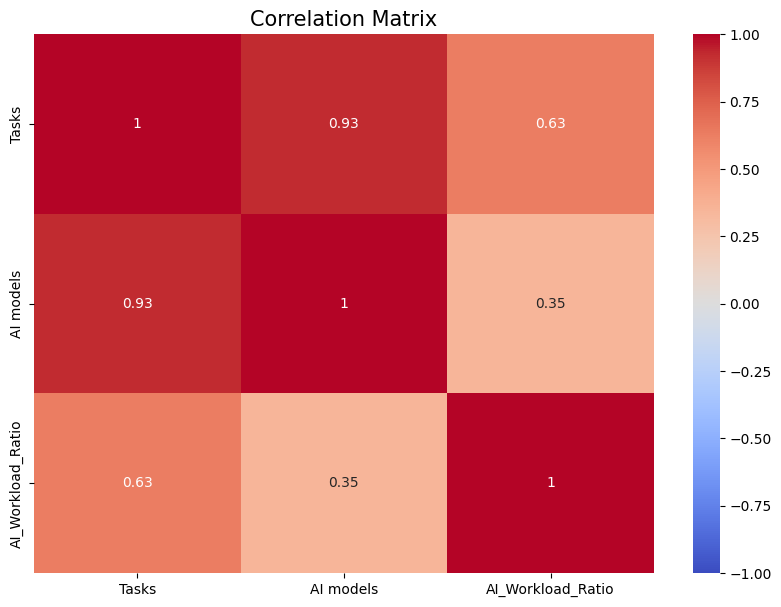

In [17]:
correlation_matrix = data[['Tasks', 'AI models', 'AI_Workload_Ratio']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

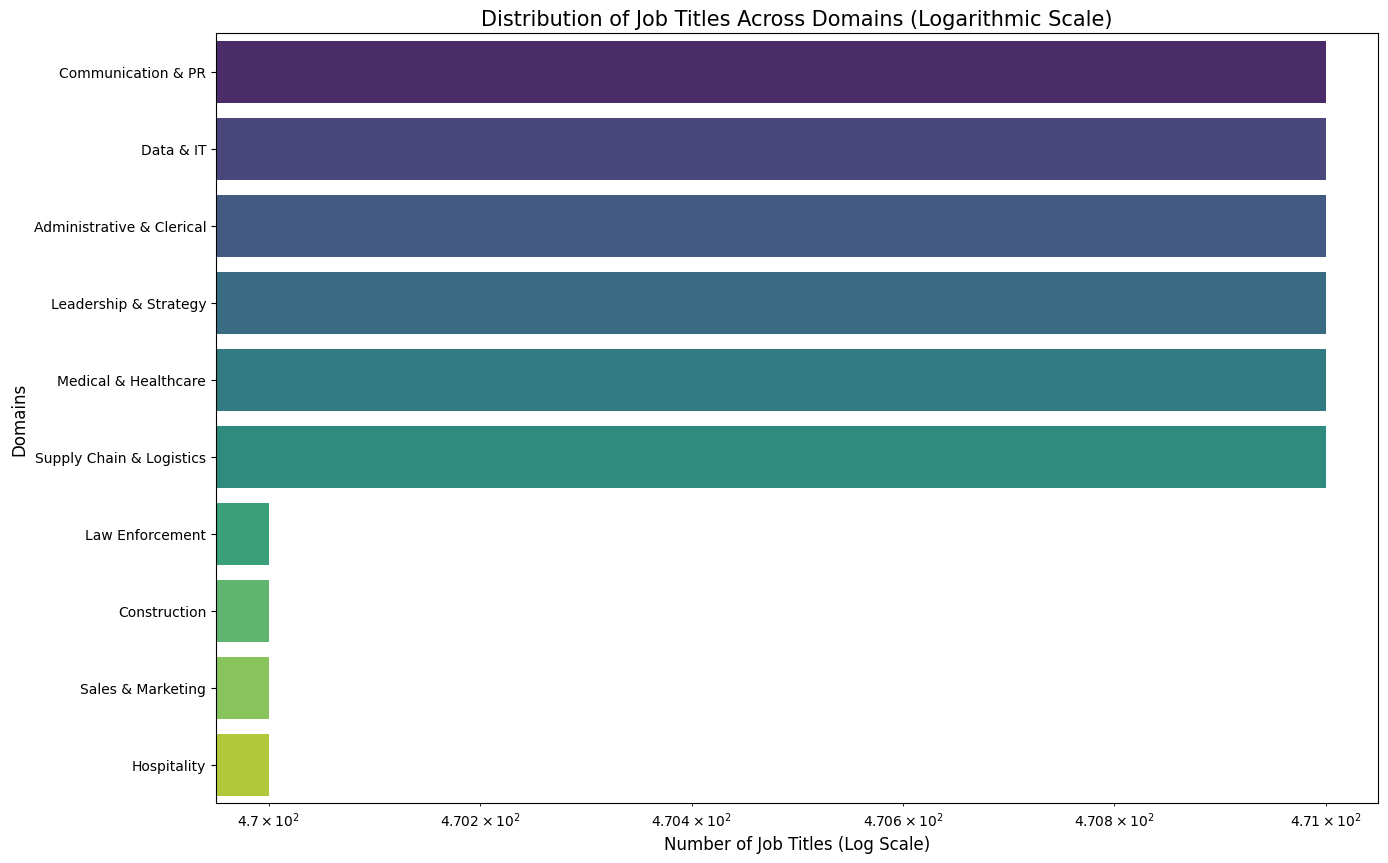

In [18]:
domain_counts = data['Domain'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(y=domain_counts.index, x=domain_counts.values, palette="viridis")
plt.xscale('log')
plt.title('Distribution of Job Titles Across Domains (Logarithmic Scale)', fontsize=15)
plt.xlabel('Number of Job Titles (Log Scale)', fontsize=12)
plt.ylabel('Domains', fontsize=12)
plt.show()

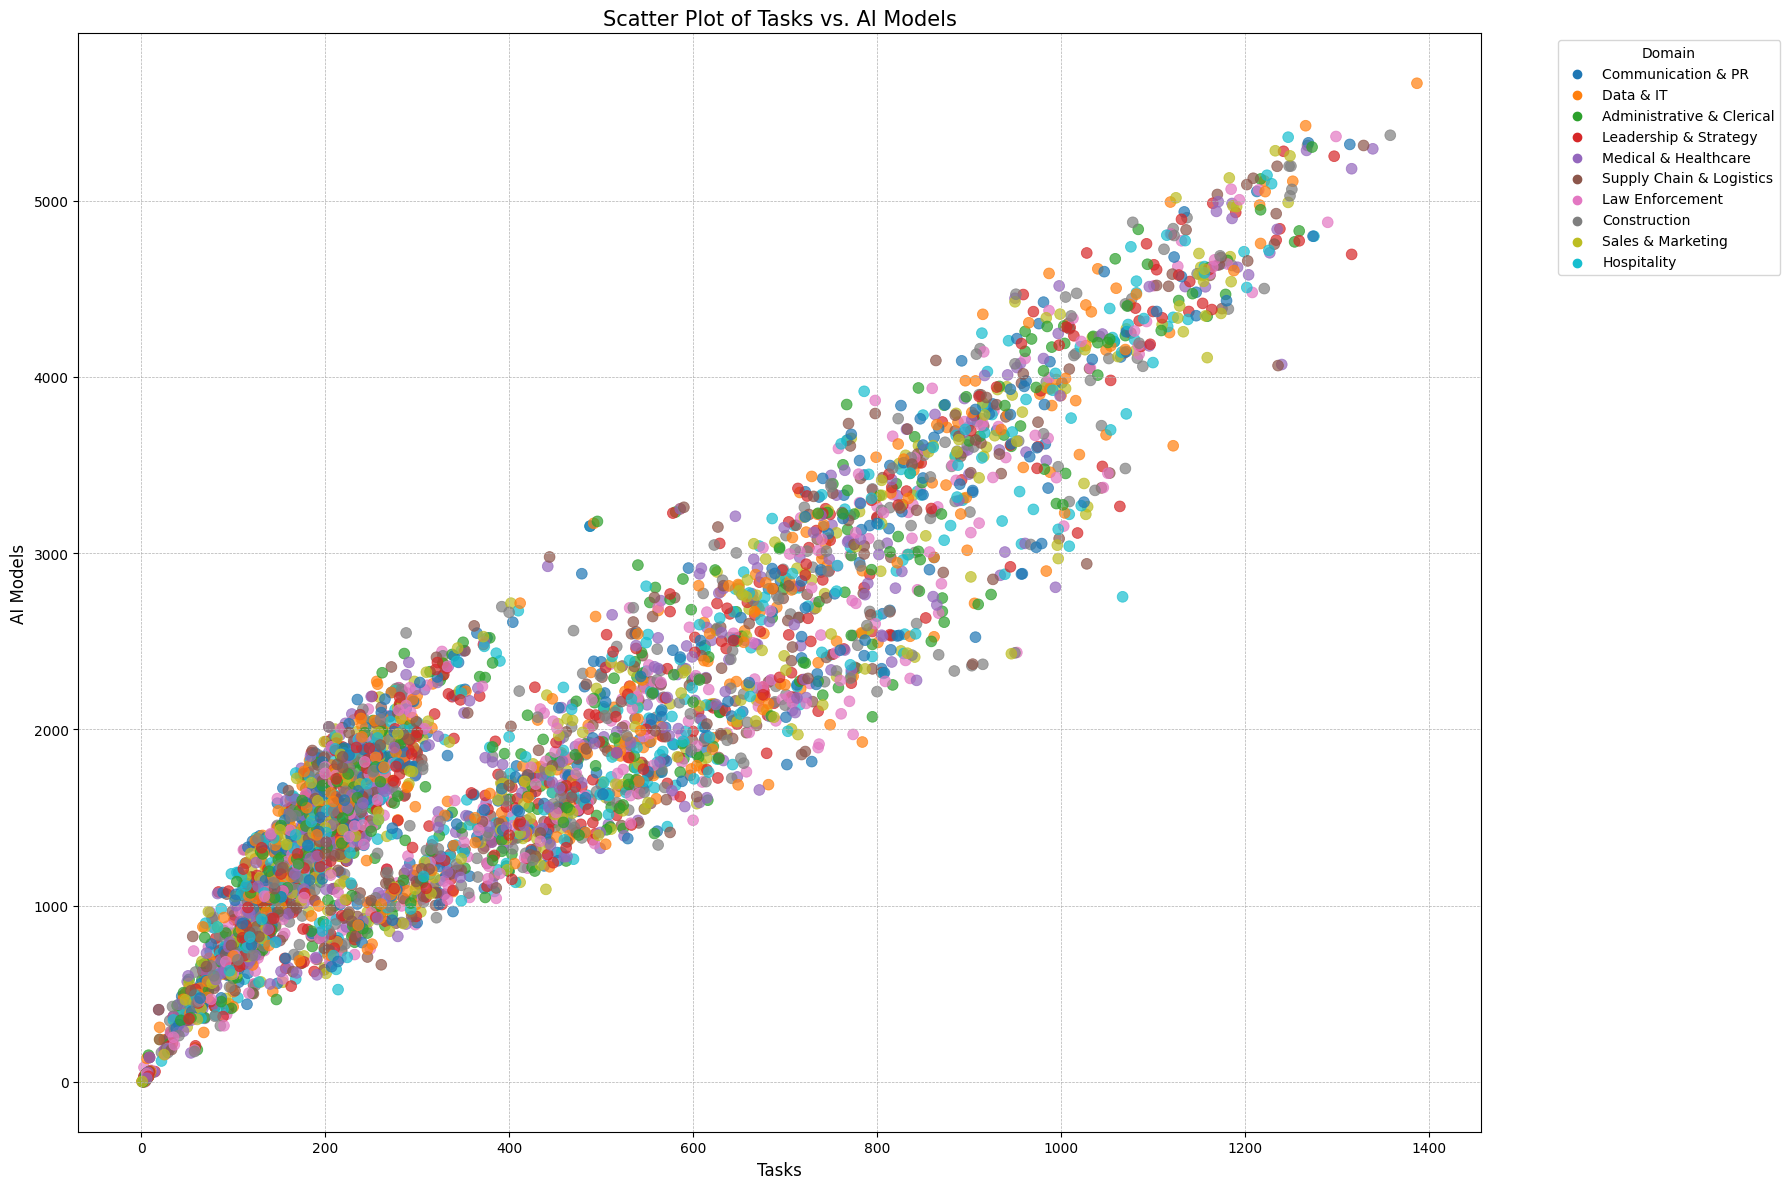

In [19]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=data, x='Tasks', y='AI models', hue='Domain', palette='tab10', s=60, alpha=0.7, edgecolor=None, marker="o")
plt.title('Scatter Plot of Tasks vs. AI Models', fontsize=15)
plt.xlabel('Tasks', fontsize=12)
plt.ylabel('AI Models', fontsize=12)
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<ipython-input-20-c74df2cd5d24>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True, color='teal')
<ipython-input-20-c74df2cd5d24>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True, color='teal')
<ipython-input-20-c74df2cd5d24>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], ax=ax, shade=True, color='teal')


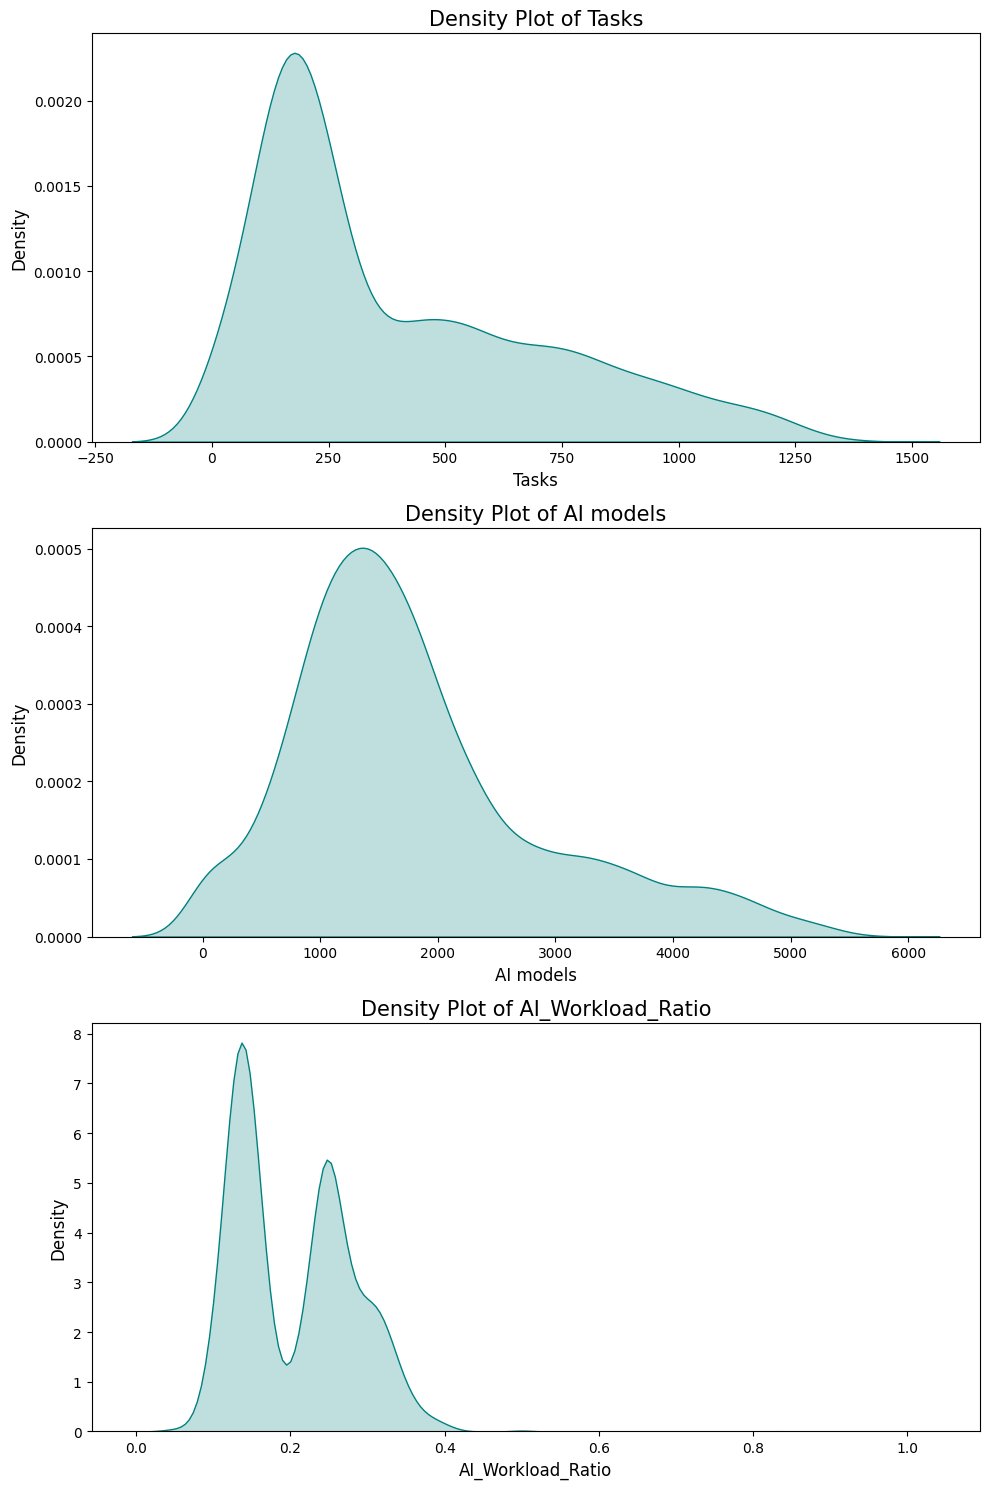

In [20]:
numerical_columns = ['Tasks', 'AI models', 'AI_Workload_Ratio']
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, column in zip(axes, numerical_columns):
    sns.kdeplot(data[column], ax=ax, shade=True, color='teal')
    ax.set_title(f'Density Plot of {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()